In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from analysis import wl_accuracy, season_record, test_n
from data_format import create_data

In [4]:
version = 6
df = pd.read_csv(f'./data/baseball/training/game_data_v{version}.csv')

In [5]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [6]:
def generate_random_results():
    results = {'away_pred': [], 'home_pred': [], 'away_true': y_test_away, 'home_true': y_test_home}
    
    for i in range(len(y_test_away)):
        results['away_pred'].append(random.randint(0, 1))
        results['home_pred'].append(1 - results['away_pred'][i])
    
    return pd.DataFrame(results)

In [7]:
results = generate_random_results()

print('RANDOM GUESSING MODEL')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)

RANDOM GUESSING MODEL
Accuracy: 49.876543209876544%
------------------------------
Season records:
HOU: 92-70	LAA: 92-70	PHI: 92-70	STL: 91-71	BAL: 89-73	
NYY: 88-74	SEA: 86-76	CIN: 83-79	NYM: 83-79	OAK: 83-79	
TEX: 83-79	CHC: 82-80	LAD: 82-80	AZ: 81-81	CLE: 81-81	
MIL: 80-82	TOR: 80-82	MIN: 79-83	KC: 79-83	TB: 79-83	
PIT: 78-84	DET: 78-84	COL: 77-85	ATL: 77-85	WSH: 76-86	
SF: 76-86	MIA: 72-90	CWS: 72-90	SD: 71-91	BOS: 68-94	


                0
count  500.000000
mean    50.026584
std      1.002569
min     46.666667
25%     49.259259
50%     50.123457
75%     50.709877
max     52.592593


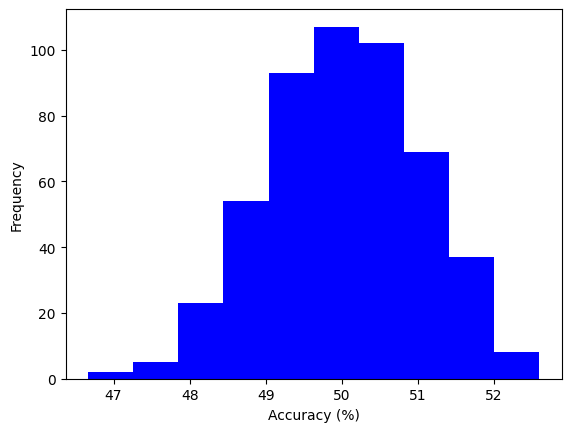

In [11]:
acc = []

for i in range(500): # try 1000 - does it resemble normal distribution?
    results = generate_random_results()
    acc.append(wl_accuracy(results))

plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

print(pd.DataFrame(acc).describe())

plt.hist(acc, color='b')
plt.show()

In [12]:
pd.DataFrame(acc).describe()

,0
count,500.000000
mean,50.026584
std,1.002569
min,46.666667
25%,49.259259
50%,50.123457
75%,50.709877
max,52.592593
